# Fitness Watch Data Analysis

Fitness Watch Data Analysis involves analyzing the data collected by fitness wearables or smartwatches to gain insights into users’ health and activity
patterns. These devices track metrics like steps taken, energy burned, walking speed, and more. So, if you want to learn how to analyze the data of a 
fitness watch, this article is for you. In this article, I’ll take you through the task of Fitness Watch Data Analysis using Python.



Below is the process we can follow while working on the problem of Fitness Watch Data Analysis:

-- Collect data from fitness watches, ensuring it’s accurate and reliable.
-- Perform EDA to gain initial insights into the data.
-- Create new features from the raw data that might provide more meaningful insights.
-- Create visual representations of the data to communicate insights effectively.
-- Segment user’s activity based on time intervals or the level of fitness metrics and analyze their performance.

In [5]:
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import plotly.express as px

df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Apple-Fitness-Data.csv")
print(df.head())

         Date       Time  Step Count  Distance  Energy Burned  \
0  2023-03-21  16:01:23           46   0.02543         14.620   
1  2023-03-21  16:18:37          645   0.40041         14.722   
2  2023-03-21  16:31:38           14   0.00996         14.603   
3  2023-03-21  16:45:37           13   0.00901         14.811   
4  2023-03-21  17:10:30           17   0.00904         15.153   

   Flights Climbed  Walking Double Support Percentage  Walking Speed  
0                3                              0.304          3.060  
1                3                              0.309          3.852  
2                4                              0.278          3.996  
3                3                              0.278          5.040  
4                3                              0.281          5.184  


In [7]:
 # Let’s have a look if this data contains any null values or not:
df.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [ ]:
# So, the data doesn’t have any null values. Let’s move further by analyzing my step count over time:

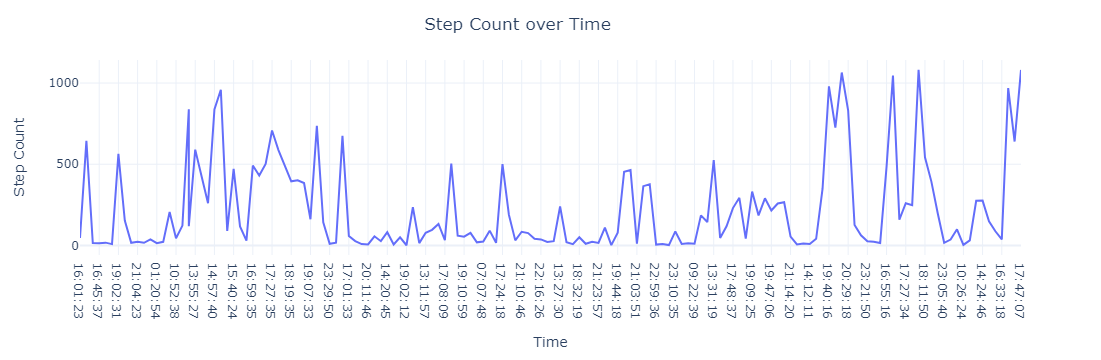

In [14]:
fig=px.line(df,y="Step Count",x="Time")
fig.update_layout(title="Step Count over Time",title_x=0.47)
fig.show()

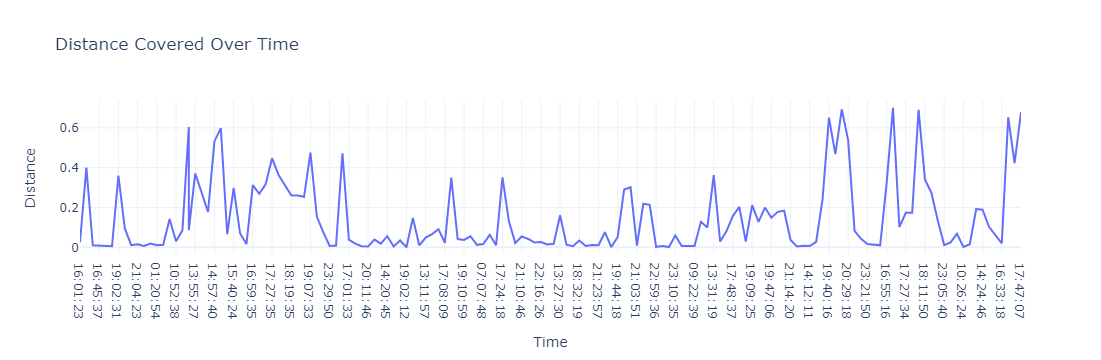

In [28]:
#Now, let’s have a look at the distance covered over time:


# Distance Covered Over Time

fig = px.line(df, x="Time",

               y="Distance",

               title="Distance Covered Over Time")

fig.show()

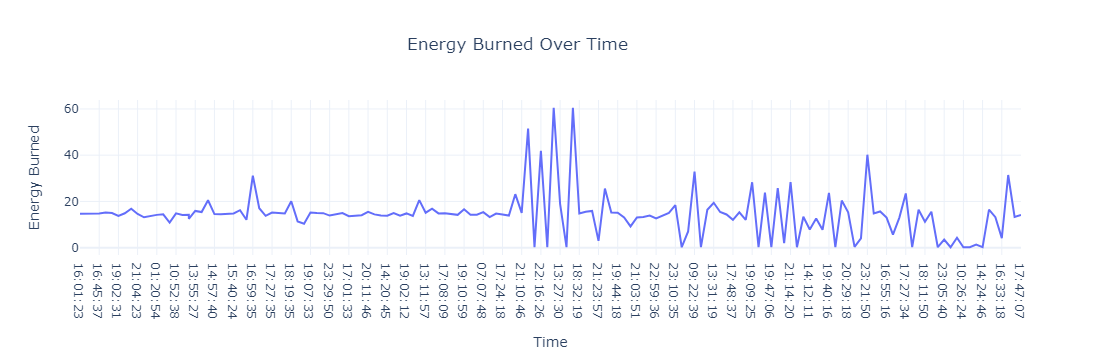

In [33]:
# Now, let’s have a look at my energy burned over time:



# Energy Burned Over Time

fig = px.line(df, x="Time",

               y="Energy Burned",

               title="Energy Burned Over Time")
fig.update_layout(title_x=0.47)

fig.show()


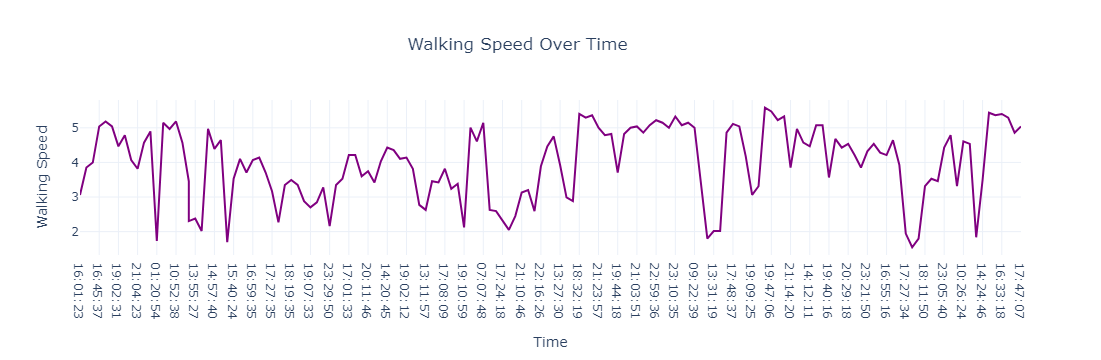

In [39]:
#Now, let’s have a look at my walking speed over time:


# Walking Speed Over Time

fig = px.line(df, x="Time",

               y="Walking Speed",

               title="Walking Speed Over Time")
fig.update_layout(title_x=0.47)
fig.update_traces(line_color='purple')

fig.show()


In [42]:
# Now, let’s calculate and look at the average step counts per day:


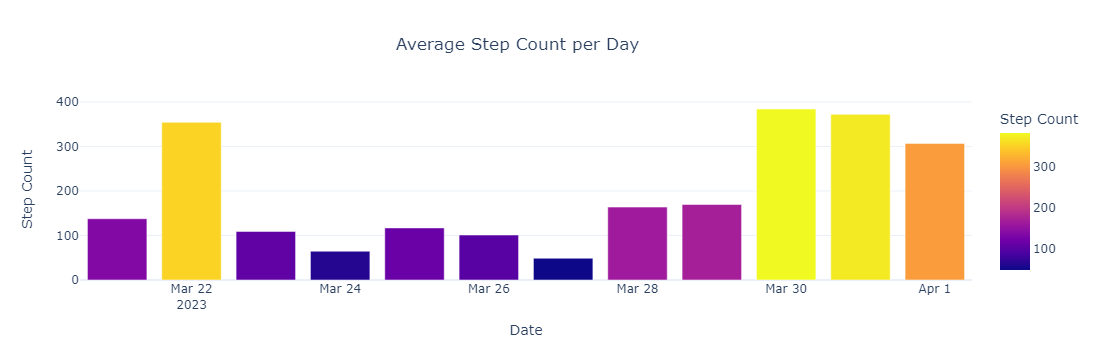

In [56]:
average_step_count = df.groupby("Date")["Step Count"].mean().reset_index()

fig = px.bar(average_step_count, x="Date",
              y="Step Count",
              title="Average Step Count per Day",color="Step Count")
fig.update_layout(title_x=0.47)

fig.show()

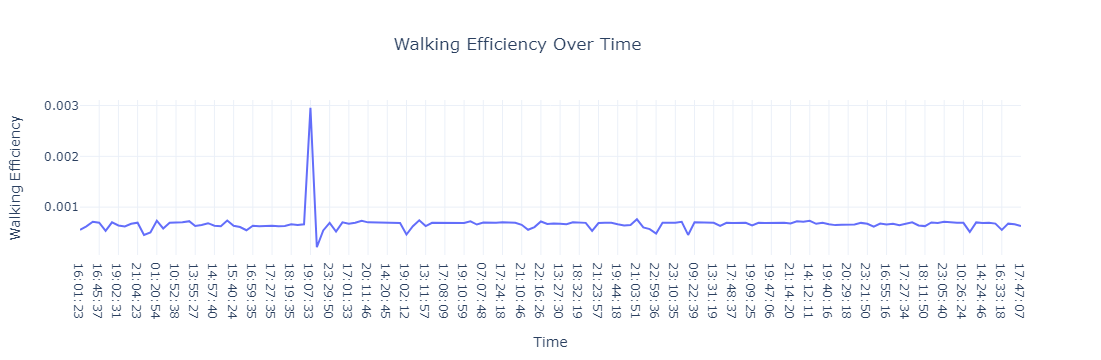

In [97]:
#Now, let’s have a look at my walking efficiency over time:
# Calculate Walking Efficiency

df["Walking Efficiency"] = df["Distance"] / df["Step Count"]
fig= px.line(df, x="Time",
               y="Walking Efficiency",title="Walking Efficiency Over Time")
fig.update_layout(title_x=0.47)
fig.show()

In [61]:
# Now, let’s have a look at the step count and walking speed variations by time intervals:
time_intervals = pd.cut(pd.to_datetime(df["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

df["Time Interval"] = time_intervals
df["Time Interval"]




0      Afternoon
1      Afternoon
2      Afternoon
3      Afternoon
4      Afternoon
         ...    
144    Afternoon
145    Afternoon
146    Afternoon
147    Afternoon
148    Afternoon
Name: Time Interval, Length: 149, dtype: category
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']

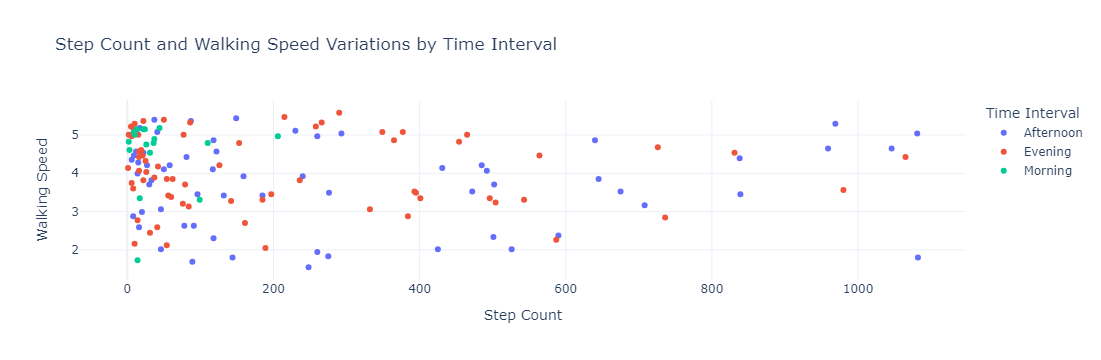

In [68]:
# Variations in Step Count and Walking Speed by Time Interval
fig = px.scatter(df, x="Step Count",
                  y="Walking Speed",
                  color="Time Interval",
                  title="Step Count and Walking Speed Variations by Time Interval")
fig.show()

In [69]:
df.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed,Walking Efficiency,Time Interval
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060,0.000553,Afternoon
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852,0.000621,Afternoon
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996,0.000711,Afternoon
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040,0.000693,Afternoon
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184,0.000532,Afternoon


In [71]:
# lets just see at what time interval the stepcount is maximum
step=df.groupby("Time Interval")["Step Count"].sum()

In [72]:
step

Time Interval
Morning        703
Afternoon    18274
Evening      14542
Name: Step Count, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



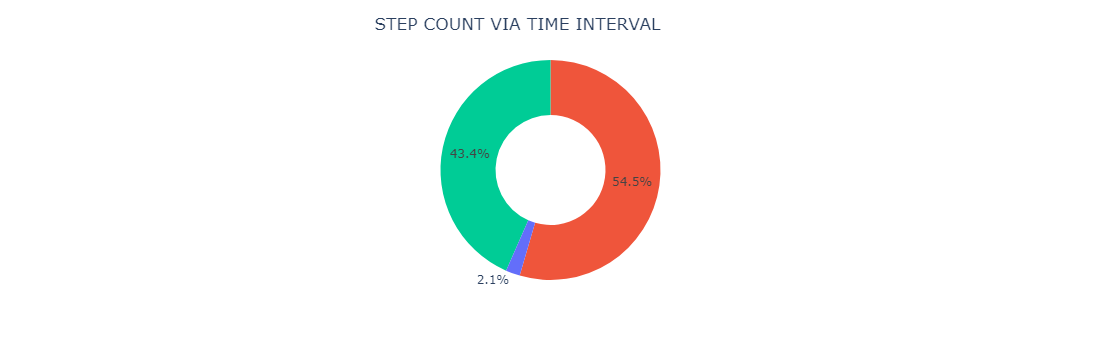

In [95]:
fig=px.pie(step,labels=step.index,values=step.values,color=step.index,hole=0.5)
fig.update_layout(title="STEP COUNT VIA TIME INTERVAL",title_x=0.47)

#fig.update_traces(hover_info="text+label")
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11684\1477109273.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



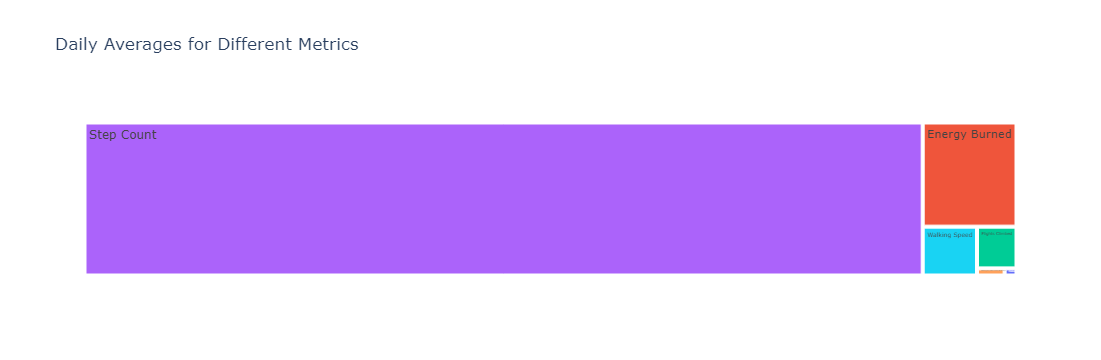

In [94]:
# Now, let’s compare the daily average of all the health and fitness metrics:


# Reshape data for treemap

daily_avg_metrics = df.groupby("Date").mean().reset_index()
daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"], 

                                                  value_vars=["Step Count", "Distance", 

                                                              "Energy Burned", "Flights Climbed", 

                                                              "Walking Double Support Percentage", 

                                                              "Walking Speed"])


# Treemap of Daily Averages for Different Metrics Over Several Weeks

fig = px.treemap(daily_avg_metrics_melted,
                 path=["variable"],
                 values="value",

                 color="variable",

                 hover_data=["value"],

                 title="Daily Averages for Different Metrics")

fig.show()


# summary

Fitness Watch Data Analysis is a crucial tool for businesses in the health and wellness domain. By analyzing user data from fitness wearables, companies can understand user behaviour, offer personalized solutions, and contribute to improving users’ overall health and well-being. I hope you liked this article on Fitness Watch Data Analysis using Python. Feel free to ask valuable questions in the comments section below.